In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [2]:
df = pd.read_csv('rnn_data.csv', index_col=0, parse_dates=True)
df.head()

,Count
Date_Time,
2020-09-21 02:00:00,22
2020-09-21 04:00:00,3
2020-09-21 05:00:00,2
2020-09-21 06:00:00,3
2020-09-21 07:00:00,3


In [3]:
df=df.resample('H').mean()

In [4]:
df.fillna(method='ffill', inplace=True)
df.head()

,Count
Date_Time,
2020-09-21 02:00:00,22.0
2020-09-21 03:00:00,22.0
2020-09-21 04:00:00,3.0
2020-09-21 05:00:00,2.0
2020-09-21 06:00:00,3.0


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

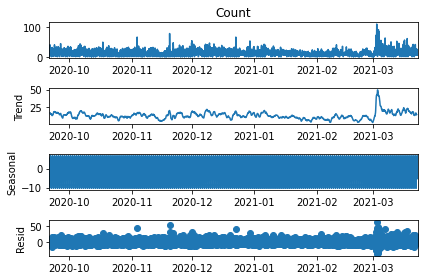

In [6]:
results = seasonal_decompose(df['Count'])
results.plot();

In [7]:
len(df)

4391

In [13]:
train = df.iloc[:-60]
test = df.iloc[-60:]


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
df.head(),df.tail()

(                     Count
 Date_Time                 
 2020-09-21 02:00:00   22.0
 2020-09-21 03:00:00   22.0
 2020-09-21 04:00:00    3.0
 2020-09-21 05:00:00    2.0
 2020-09-21 06:00:00    3.0,
                      Count
 Date_Time                 
 2021-03-22 20:00:00   18.0
 2021-03-22 21:00:00    7.0
 2021-03-22 22:00:00   24.0
 2021-03-22 23:00:00   17.0
 2021-03-23 00:00:00    7.0)

In [16]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
scaled_train[:10]

array([[0.19090909],
       [0.19090909],
       [0.01818182],
       [0.00909091],
       [0.01818182],
       [0.01818182],
       [0.05454545],
       [0.04545455],
       [0.20909091],
       [0.36363636]])

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# define generator
n_input = 48
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.19090909 0.19090909 0.01818182 0.00909091 0.01818182 0.01818182
 0.05454545 0.04545455 0.20909091 0.36363636 0.24545455 0.13636364
 0.10909091 0.27272727 0.1        0.26363636 0.21818182 0.24545455
 0.18181818 0.21818182 0.16363636 0.17272727 0.09090909 0.07272727
 0.07272727 0.         0.         0.         0.01818182 0.05454545
 0.03636364 0.1        0.17272727 0.25454545 0.13636364 0.28181818
 0.22727273 0.14545455 0.02727273 0.21818182 0.10909091 0.11818182
 0.16363636 0.2        0.14545455 0.1        0.09090909 0.10909091]
Predict this y: 
 [[0.01818182]]


In [21]:
X.shape

(1, 48, 1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2021-09-05 16:02:24.022116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-09-05 16:02:24.144842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-09-05 16:02:24.144876: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-09-05 16:02:24.146191: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(generator,epochs=10)

2021-09-05 16:02:44.366146: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
4283/4283 [==============================] - 168s 39ms/step - loss: 0.0052
Epoch 2/10
4283/4283 [==============================] - 155s 36ms/step - loss: 0.0043
Epoch 3/10
4283/4283 [==============================] - 158s 37ms/step - loss: 0.0042
Epoch 4/10
4283/4283 [==============================] - 149s 35ms/step - loss: 0.0041
Epoch 5/10
4283/4283 [==============================] - 159s 37ms/step - loss: 0.0040
Epoch 6/10
4283/4283 [==============================] - 153s 36ms/step - loss: 0.0040
Epoch 7/10
4283/4283 [==============================] - 143s 33ms/step - loss: 0.0039
Epoch 8/10
4283/4283 [==============================] - 150s 35ms/step - loss: 0.0039
Epoch 9/10
4283/4283 [==============================] - 150s 35ms/step - loss: 0.0039
Epoch 10/10
4283/4283 [==============================] - 153s 36ms/step - loss: 0.0039


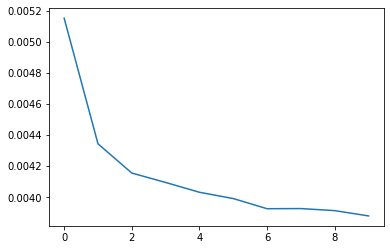

In [26]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [27]:
last_train_batch = scaled_train[-48:]

In [28]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))


In [31]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [32]:
test_predictions

[array([0.16797024], dtype=float32),
 array([0.16182837], dtype=float32),
 array([0.15734887], dtype=float32),
 array([0.15124881], dtype=float32),
 array([0.14458784], dtype=float32),
 array([0.13795494], dtype=float32),
 array([0.12948868], dtype=float32),
 array([0.11734883], dtype=float32),
 array([0.10204269], dtype=float32),
 array([0.08389395], dtype=float32),
 array([0.06317794], dtype=float32),
 array([0.04180825], dtype=float32),
 array([0.0263567], dtype=float32),
 array([0.01638994], dtype=float32),
 array([0.01299077], dtype=float32),
 array([0.01694018], dtype=float32),
 array([0.02765273], dtype=float32),
 array([0.0440205], dtype=float32),
 array([0.06774894], dtype=float32),
 array([0.09603943], dtype=float32),
 array([0.11803646], dtype=float32),
 array([0.13289674], dtype=float32),
 array([0.13991204], dtype=float32),
 array([0.13765082], dtype=float32),
 array([0.1314984], dtype=float32),
 array([0.12541114], dtype=float32),
 array([0.12009896], dtype=float32),
 arr

In [33]:
test.head()

,Count
Date_Time,
2021-03-20 13:00:00,38.0
2021-03-20 14:00:00,30.0
2021-03-20 15:00:00,32.0
2021-03-20 16:00:00,42.0
2021-03-20 17:00:00,21.0


In [34]:
true_predictions = scaler.inverse_transform(test_predictions)

In [35]:
test['Predictions'] = true_predictions

/home/kara/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='Date_Time'>

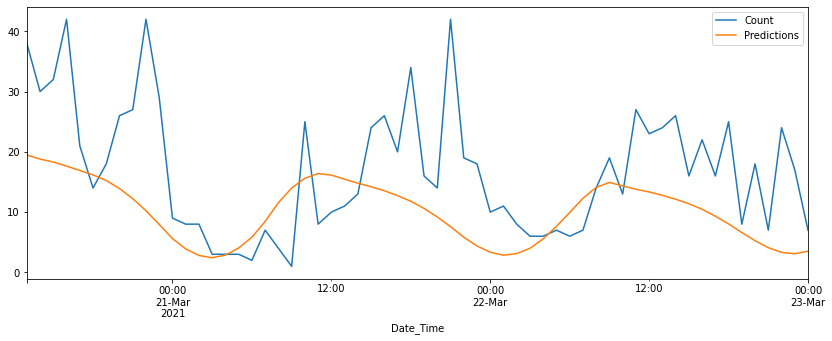

In [36]:
test.plot(figsize=(14,5))

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Count'],test['Predictions']))
print(rmse)

11.608522981644807
